#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
import requests
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.preprocessing import StandardScaler

Download CSV Dataset from Google Drive

Drive Link: https://drive.google.com/file/d/1y8JuGq0Vs-T_snaxT61GOEgmaDOU3laq/view?usp=sharing

Source: https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios/data

In [2]:
!gdown --id 1XwGS1oD7vKpWgXWnwQ2BoMsuS5ciQ55-

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XwGS1oD7vKpWgXWnwQ2BoMsuS5ciQ55-
To: /content/customer_churn.csv
100% 978k/978k [00:00<00:00, 8.94MB/s]


# Importing the Dataset


In [3]:
# Read the CSV file
df = pd.read_csv('/content/customer_churn.csv')

# Explore the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Get All Column Names

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Removing unncessary Columns

In [5]:
df = df.drop(columns=["customerID", 'gender', ], axis=1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Visualizing the Dataset

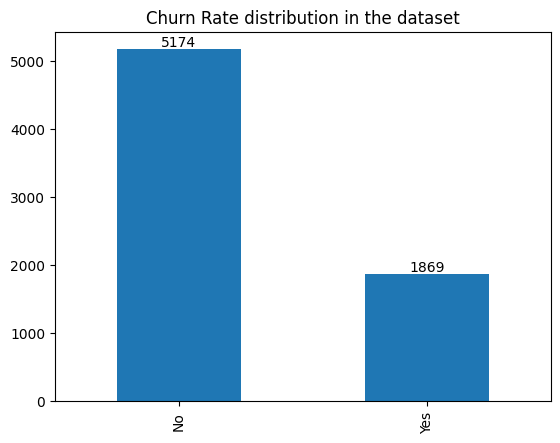

In [6]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Count the occurrences of each unique value in the 'Rating' column
rating_counts = df['Churn'].value_counts()

# Create a bar plot
ax = rating_counts.plot(kind='bar', title='Churn Rate distribution in the dataset')

# Add annotations on top of each bar with the sample count
for i, v in enumerate(rating_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Show the plot
plt.show()


# Splitting the Dataset into Labeled and Unlabeled Data

In [7]:
labeled_data, unlabeled_data= train_test_split(df, test_size=0.85, random_state=42)

In [8]:
print(f"Labeled Dataset Size: {len(labeled_data.index)}")
print(f"Unlabeled Dataset Size: {len(unlabeled_data.index)}")

Labeled Dataset Size: 1056
Unlabeled Dataset Size: 5987


In [9]:
labeled_data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2397,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35,Yes
3517,0,Yes,No,70,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.50,7534.65,Yes
3421,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),97.00,7104.2,No
2563,1,No,No,25,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,105.95,2655.25,Yes
5622,0,No,No,23,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,104.05,2470.1,Yes


# Training on Full Labeled Data

In [10]:
X_view_full_labeled_dataset = labeled_data.iloc[:,0:-1]
Y_view_full_labeled_dataset = labeled_data.iloc[:,-1]

In [11]:
Y_view_full_labeled_dataset.head()

2397    Yes
3517    Yes
3421     No
2563    Yes
5622    Yes
Name: Churn, dtype: object

In [12]:
X_view_full_labeled_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 2397 to 860
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     1056 non-null   int64  
 1   Partner           1056 non-null   object 
 2   Dependents        1056 non-null   object 
 3   tenure            1056 non-null   int64  
 4   PhoneService      1056 non-null   object 
 5   MultipleLines     1056 non-null   object 
 6   InternetService   1056 non-null   object 
 7   OnlineSecurity    1056 non-null   object 
 8   OnlineBackup      1056 non-null   object 
 9   DeviceProtection  1056 non-null   object 
 10  TechSupport       1056 non-null   object 
 11  StreamingTV       1056 non-null   object 
 12  StreamingMovies   1056 non-null   object 
 13  Contract          1056 non-null   object 
 14  PaperlessBilling  1056 non-null   object 
 15  PaymentMethod     1056 non-null   object 
 16  MonthlyCharges    1056 non-null   float6

In [13]:
X_view_full_labeled_dataset.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [14]:
X_view_full_labeled_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2397,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35
3517,0,Yes,No,70,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.50,7534.65
3421,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),97.00,7104.2
2563,1,No,No,25,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,105.95,2655.25
5622,0,No,No,23,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,104.05,2470.1


In [15]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # Initialize LabelEncoder for binary variables
# label_encoder = LabelEncoder()

# # Apply Label Encoding to binary variables
# binary_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#                         'TechSupport', 'StreamingTV', 'StreamingMovies']
# for column in binary_columns:
#     X_view_full_labeled_dataset[column] = label_encoder.fit_transform(X_view_full_labeled_dataset[column])

# # Apply One-Hot Encoding to variables with more than two categories
# categorical_columns = ['InternetService',  'Contract', 'PaymentMethod']

# X_view_full_labeled_dataset = pd.get_dummies(X_view_full_labeled_dataset, columns=categorical_columns, drop_first=True)

# # Display the updated DataFrame
# X_view_full_labeled_dataset.head()

# # Encoding the Dependent Variable
# labelencoder_y = LabelEncoder()
# Y_view_full_labeled_dataset = labelencoder_y.fit_transform(Y_view_full_labeled_dataset)


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder for binary variables
label_encoder = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for column in binary_columns:
    X_view_full_labeled_dataset[column] = label_encoder.fit_transform(X_view_full_labeled_dataset[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

X_view_full_labeled_dataset = pd.get_dummies(X_view_full_labeled_dataset, columns=categorical_columns, drop_first=True)

# Display the updated DataFrame
X_view_full_labeled_dataset.head()

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view_full_labeled_dataset = labelencoder_y.fit_transform(Y_view_full_labeled_dataset)


In [17]:
X_view_full_labeled_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 2397 to 860
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          1056 non-null   int64  
 1   Partner                                1056 non-null   int64  
 2   Dependents                             1056 non-null   int64  
 3   tenure                                 1056 non-null   int64  
 4   PhoneService                           1056 non-null   int64  
 5   PaperlessBilling                       1056 non-null   int64  
 6   MonthlyCharges                         1056 non-null   float64
 7   TotalCharges                           1056 non-null   object 
 8   MultipleLines_No phone service         1056 non-null   uint8  
 9   MultipleLines_Yes                      1056 non-null   uint8  
 10  InternetService_Fiber optic            1056 non-null   uint8  
 11  In

In [18]:
X_view_full_labeled_train, X_view_full_labeled_test, y_view_full_labeled_train, y_full_view_labeled_test = train_test_split(X_view_full_labeled_dataset, Y_view_full_labeled_dataset, test_size=0.2, random_state=42)

In [19]:
# # Convert 'TotalCharges' to numeric, handling errors by setting them to NaN
# X_view_full_labeled_train['TotalCharges'] = pd.to_numeric(X_view_full_labeled_train['TotalCharges'], errors='coerce')
# X_view_full_labeled_test['TotalCharges'] = pd.to_numeric(X_view_full_labeled_test['TotalCharges'], errors='coerce')

# # Now, apply StandardScaler
# from sklearn.preprocessing import StandardScaler

# # Specify the strategy for imputation (mean, median, most_frequent, etc.)
# imputer = SimpleImputer(strategy='mean')

# # Fit and transform the imputer on the training data for the 'TotalCharges' column
# X_view_full_labeled_train[['TotalCharges']] = imputer.fit_transform(X_view_full_labeled_train[['TotalCharges']])

# # Transform the test data for the 'TotalCharges' column using the fitted imputer
# X_view_full_labeled_test[['TotalCharges']] = imputer.transform(X_view_full_labeled_test[['TotalCharges']])


# Drop the original 'TotalCharges' column if you have replaced it with a numeric version
X_view_full_labeled_train = X_view_full_labeled_train.drop(columns=['TotalCharges'])
X_view_full_labeled_test = X_view_full_labeled_test.drop(columns=['TotalCharges'])

# Check for missing values after conversion
print("Missing values after conversion:")
print(X_view_full_labeled_train.isnull().sum())

# Initialize StandardScaler
sc_X_full_labeled = StandardScaler()

# Apply StandardScaler
X_view_full_labeled_train = sc_X_full_labeled.fit_transform(X_view_full_labeled_train)
X_view_full_labeled_test = sc_X_full_labeled.transform(X_view_full_labeled_test)


Missing values after conversion:
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes  

In [20]:
from sklearn.decomposition import PCA

n_components_full_labeled = 16  # Adjust the number of components as needed
pca_full_labeled = PCA(n_components=n_components_full_labeled)
X_view_full_labeled_train = pca_full_labeled.fit_transform(X_view_full_labeled_train)
X_view_full_labeled_test = pca_full_labeled.transform(X_view_full_labeled_test)

# Model Training on Full Labeled Data

In [21]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote_full_labeled = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
X_view_full_labeled_resampled, y_view_full_labeled_resampled = smote_full_labeled.fit_resample(X_view_full_labeled_train, y_view_full_labeled_train)

# Set a seed for reproducibility
np.random.seed(42)

print("------------KNN---------------")
knn_classifier_full_labeled = KNeighborsClassifier()

# Fit the model without hyperparameter tuning
knn_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_knn = knn_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_KNN_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_knn)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_knn, zero_division=0))

print(f"------------Decision Tree---------------")
DT_classifier_full_labeled = DecisionTreeClassifier()

# Fit the model without hyperparameter tuning
DT_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_dt = DT_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_DT_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_dt)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_dt, zero_division=0))

print(f"------------Naive Bayes---------------")
NB_classifier_full_labeled = GaussianNB()

# Fit the model without hyperparameter tuning
NB_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_nb = NB_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_NB_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_nb)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_nb, zero_division=0))

print(f"------------Random Forest---------------")
RF_classifier_full_labeled = RandomForestClassifier()

# Fit the model without hyperparameter tuning
RF_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_rf = RF_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_RF_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_rf)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_rf, zero_division=0))

print(f"------------SVC---------------")
SVC_classifier_full_labeled = SVC()

# Fit the model without hyperparameter tuning
SVC_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_svc = SVC_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_SVC_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_svc)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_svc, zero_division=0))

print(f"------------XG Boost---------------")
XGB_classifier_full_labeled = XGBClassifier()

# Fit the model without hyperparameter tuning
XGB_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_xgb = XGB_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_XGB_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_xgb)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_xgb, zero_division=0))




------------KNN---------------
              precision    recall  f1-score   support

           0       0.94      0.56      0.70       163
           1       0.37      0.88      0.52        49

    accuracy                           0.63       212
   macro avg       0.66      0.72      0.61       212
weighted avg       0.81      0.63      0.66       212

------------Decision Tree---------------
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       163
           1       0.43      0.65      0.52        49

    accuracy                           0.72       212
   macro avg       0.65      0.70      0.66       212
weighted avg       0.77      0.72      0.74       212

------------Naive Bayes---------------
              precision    recall  f1-score   support

           0       0.89      0.67      0.76       163
           1       0.40      0.73      0.52        49

    accuracy                           0.68       212
   macro avg     

In [22]:
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled, Accuracy_DT_full_labeled, Accuracy_NB_full_labeled, Accuracy_RF_full_labeled, Accuracy_SVC_full_labeled, Accuracy_XGB_full_labeled]

model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list_full_labeled})

<ipython-input-23-09ae925b18a9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


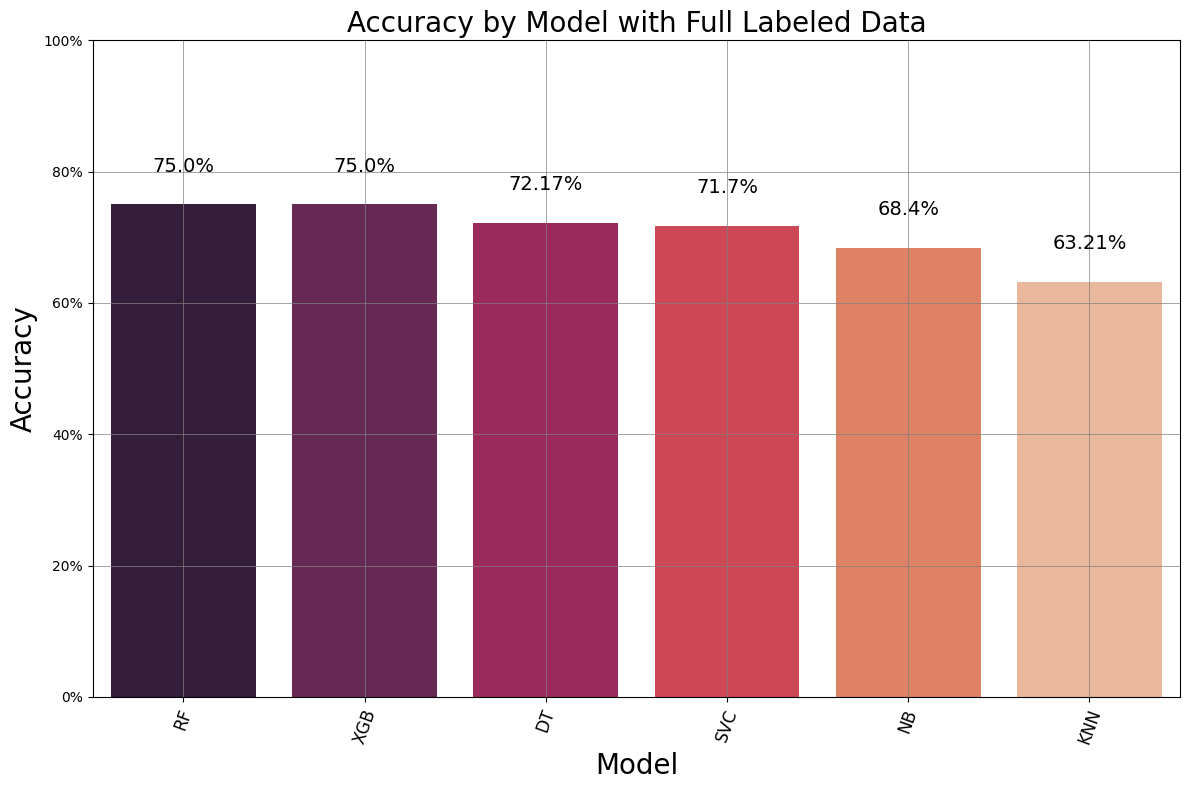

In [23]:
import matplotlib.ticker as mtick

order = list(df_accuracy_full_labeled.sort_values('Accuracy', ascending=False).Model)
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy_full_labeled, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title(f"Accuracy by Model with Full Labeled Data", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy_full_labeled.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy_full_labeled.loc[i, 'Accuracy'])*100, 2))+'%',
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


# With Hyperparameter Tuning

In [24]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

smote_full_labeled = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view_full_labeled_resampled, y_view_full_labeled_resampled = smote_full_labeled.fit_resample(X_view_full_labeled_train, y_view_full_labeled_train)

# Set a seed for reproducibility
np.random.seed(42)

print("------------KNN---------------")
knn_classifier_full_labeled = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9]}

# Perform Grid Search
grid_search_knn = GridSearchCV(knn_classifier_full_labeled, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for KNN:", best_params_knn)

# Make predictions on the test set with the best model
y_full_labeled_pred_knn_grid = grid_search_knn.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_KNN_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_knn_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_knn_grid, zero_division=0))

print(f"------------Decision Tree---------------")
DT_classifier_full_labeled = DecisionTreeClassifier()

# Define the parameter grid for Decision Tree
param_grid_dt = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 5, 10, 15, 20]}

# Perform Grid Search
grid_search_dt = GridSearchCV(DT_classifier_full_labeled, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Make predictions on the test set with the best model
y_full_labeled_pred_dt_grid = grid_search_dt.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_DT_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_dt_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_dt_grid, zero_division=0))

print(f"------------Naive Bayes---------------")
from sklearn.naive_bayes import GaussianNB
# Train a classifier on the resampled data
NB_classifier_full_labeled = GaussianNB()
NB_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_nb = NB_classifier_full_labeled.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_NB_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_nb)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_nb, zero_division=0))


print(f"------------Random Forest---------------")
RF_classifier_full_labeled = RandomForestClassifier()

# Define the parameter grid for Random Forest
param_grid_rf = {'n_estimators': [10, 50, 100, 200],
                 'criterion': ['gini', 'entropy']}

# Perform Grid Search
grid_search_rf = GridSearchCV(RF_classifier_full_labeled, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Make predictions on the test set with the best model
y_full_labeled_pred_rf_grid = grid_search_rf.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_RF_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_rf_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_rf_grid, zero_division=0))

print(f"------------SVC---------------")
SVC_classifier_full_labeled = SVC()

# Define the parameter grid for Support Vector Classifier
param_grid_svc = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Perform Grid Search
grid_search_svc = GridSearchCV(SVC_classifier_full_labeled, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_svc = grid_search_svc.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for SVC:", best_params_svc)

# Make predictions on the test set with the best model
y_full_labeled_pred_svc_grid = grid_search_svc.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_SVC_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_svc_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_svc_grid, zero_division=0))

print(f"------------XG Boost---------------")
XGB_classifier_full_labeled = XGBClassifier()

# Define the parameter grid for XG Boost
param_grid_xgb = {'n_estimators': [50, 100, 150],
                  'learning_rate': [0.01, 0.1, 0.2]}

# Perform Grid Search
grid_search_xgb = GridSearchCV(XGB_classifier_full_labeled, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for XG Boost:", best_params_xgb)

# Make predictions on the test set with the best model
y_full_labeled_pred_xgb_grid = grid_search_xgb.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_XGB_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_xgb_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_xgb_grid, zero_division=0))

------------KNN---------------
Best Hyperparameters for KNN: {'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       163
           1       0.51      0.76      0.61        49

    accuracy                           0.77       212
   macro avg       0.71      0.77      0.72       212
weighted avg       0.82      0.77      0.79       212

------------Decision Tree---------------
Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20}
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       163
           1       0.46      0.67      0.55        49

    accuracy                           0.74       212
   macro avg       0.67      0.72      0.68       212
weighted avg       0.79      0.74      0.76       212

------------Naive Bayes---------------
              precision    recall  f1-score   support

           0       0.89      0.67      0.76      

In [25]:
accuracy_list_full_labeled_tuned = [Accuracy_KNN_full_labeled_tuned, Accuracy_DT_full_labeled_tuned, Accuracy_NB_full_labeled_tuned, Accuracy_RF_full_labeled_tuned, Accuracy_SVC_full_labeled_tuned, Accuracy_XGB_full_labeled_tuned]

model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled_tuned = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list_full_labeled_tuned})

<ipython-input-26-115f784df527>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


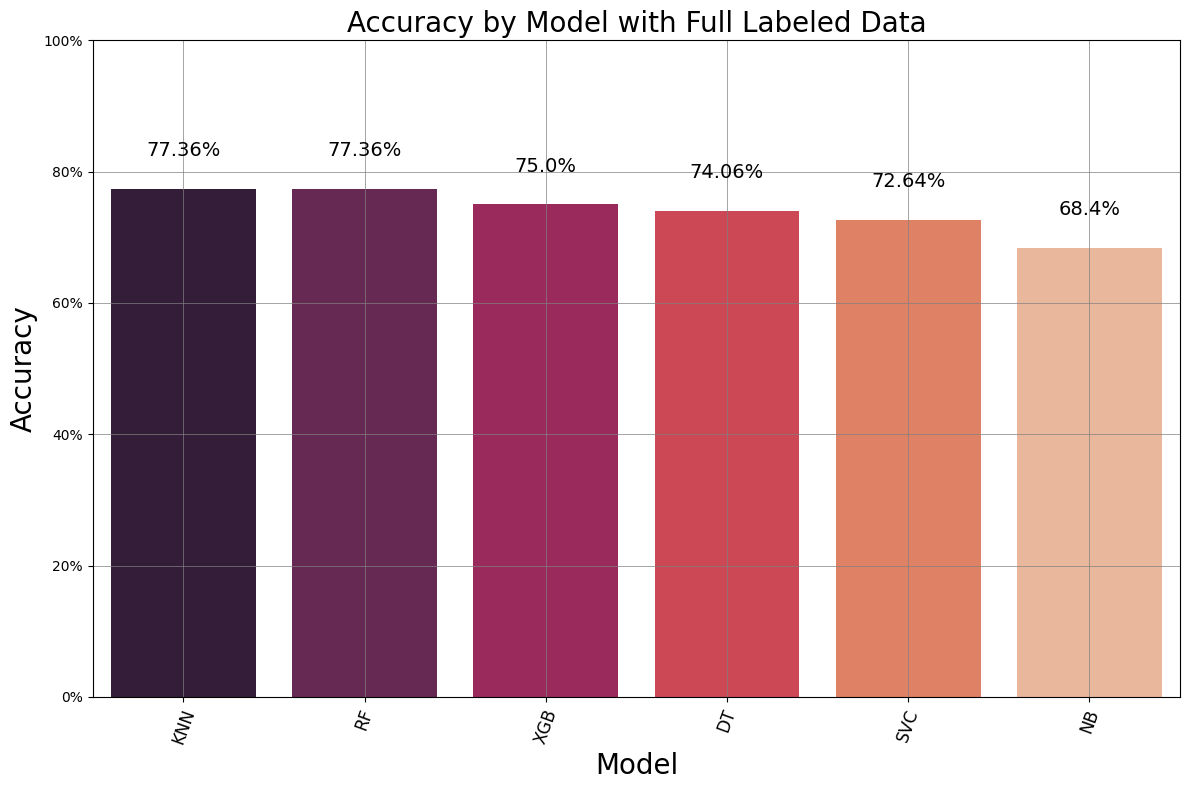

In [26]:
import matplotlib.ticker as mtick

order = list(df_accuracy_full_labeled_tuned.sort_values('Accuracy', ascending=False).Model)
df_accuracy_full_labeled_tuned = df_accuracy_full_labeled_tuned.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy_full_labeled_tuned, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title(f"Accuracy by Model with Full Labeled Data", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy_full_labeled_tuned.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy_full_labeled_tuned.loc[i, 'Accuracy'])*100, 2))+'%',
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


# Multi View Training

In [27]:
# Calculate the midpoint to split the columns into two equal parts
midpoint = len(df.columns) // 2

# Split the columns into two equal parts, excluding 'Rating' temporarily
group1 = df.iloc[:, 1:midpoint]
group2 = df.iloc[:, midpoint:-1]

# Convert to NumPy arrays if needed
group1_array = np.array(group1.columns)
group2_array = np.array(group2.columns)

# Add 'Rating' to both arrays
view1_column_names = np.concatenate((['Churn'], group1_array))
view2_column_names = np.concatenate((['Churn'], group2_array))

# Print the arrays
print("Group 1:", view1_column_names)
print("Group 2:", view2_column_names)


Group 1: ['Churn' 'Partner' 'Dependents' 'tenure' 'PhoneService' 'MultipleLines'
 'InternetService' 'OnlineSecurity' 'OnlineBackup']
Group 2: ['Churn' 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges']


In [28]:
# Create DataFrames for each view
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

# Training model on View 1

In [29]:
X_view1_dataset = view1_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]

In [30]:
X_view1_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 2397 to 860
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Partner          1056 non-null   object
 1   Dependents       1056 non-null   object
 2   tenure           1056 non-null   int64 
 3   PhoneService     1056 non-null   object
 4   MultipleLines    1056 non-null   object
 5   InternetService  1056 non-null   object
 6   OnlineSecurity   1056 non-null   object
 7   OnlineBackup     1056 non-null   object
dtypes: int64(1), object(7)
memory usage: 74.2+ KB


In [31]:
Y_view1_dataset.head()

2397    Yes
3517    Yes
3421     No
2563    Yes
5622    Yes
Name: Churn, dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)


from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder for binary variables
label_encoder = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns = ['Partner', 'Dependents', 'PhoneService']
for column in binary_columns:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns, drop_first=True)

# Display the updated DataFrame
X_view1_dataset.head()

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)



In [33]:
X_view1_train, X_view1_test, y_view1_train, y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)

In [34]:

sc_X = StandardScaler()
X_view1_train = sc_X.fit_transform(X_view1_train)
X_view1_test = sc_X.transform(X_view1_test)


# Now, apply StandardScaler
from sklearn.preprocessing import StandardScaler


# Initialize StandardScaler
sc_X_view1_labeled = StandardScaler()

# Apply StandardScaler
X_view1_train = sc_X_view1_labeled.fit_transform(X_view1_train)
X_view1_test = sc_X_view1_labeled.transform(X_view1_test)


In [35]:
from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_view1_train = pca.fit_transform(X_view1_train)
X_view1_test = pca.transform(X_view1_test)

In [36]:
from sklearn.metrics import classification_report
from sklearn import metrics

from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='not minority',k_neighbors=1, random_state=42)
smote = SMOTE(sampling_strategy='auto',k_neighbors=4, random_state=42)
X_view1_resampled, y_view1_resampled = smote.fit_resample(X_view1_train, y_view1_train)

print(f"------------KNN---------------")
from sklearn.neighbors import KNeighborsClassifier
# Train a classifier on the resampled data
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = knn_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_KNN = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

print(f"------------Decision Tree---------------")
from sklearn.tree import DecisionTreeClassifier
# Train a classifier on the resampled data
DT_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = DT_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_DT = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

print(f"------------Naive Bayes---------------")
from sklearn.naive_bayes import GaussianNB
# Train a classifier on the resampled data
NB_classifier = GaussianNB()
NB_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = NB_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_NB = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))


print(f"------------Random Forest---------------")
from sklearn.ensemble import RandomForestClassifier
# Train a classifier on the resampled data
RF_classifier = RandomForestClassifier(n_estimators=10, random_state = 0, criterion='entropy')
RF_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = RF_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_RF = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

print(f"------------SVC---------------")
from sklearn.svm import SVC
# Train a classifier on the resampled data
SVC_classifier = SVC(kernel='poly', random_state=0)
SVC_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = SVC_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_SVC = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

print(f"------------XG Boost---------------")
from xgboost import XGBClassifier
# Train a classifier on the resampled data
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = XGB_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_XGB = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

------------KNN---------------
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       163
           1       0.45      0.59      0.51        49

    accuracy                           0.74       212
   macro avg       0.66      0.69      0.66       212
weighted avg       0.77      0.74      0.75       212

------------Decision Tree---------------
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       163
           1       0.43      0.65      0.52        49

    accuracy                           0.72       212
   macro avg       0.65      0.70      0.66       212
weighted avg       0.77      0.72      0.74       212

------------Naive Bayes---------------
              precision    recall  f1-score   support

           0       0.89      0.61      0.73       163
           1       0.37      0.76      0.50        49

    accuracy                           0.65       212
   macro avg     

In [37]:
accuracy_list = [Accuracy_KNN, Accuracy_DT, Accuracy_NB, Accuracy_RF, Accuracy_SVC, Accuracy_XGB]

model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

<ipython-input-38-6d8e3519b751>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


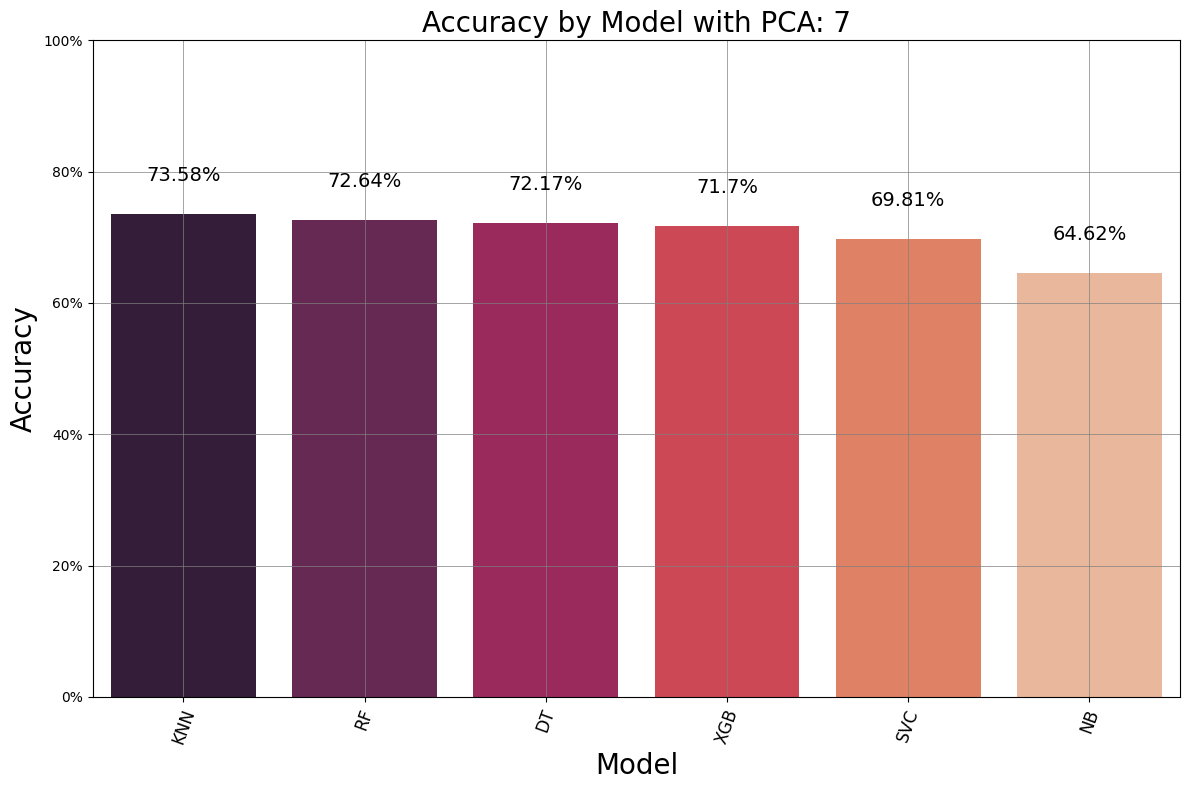

In [38]:
import matplotlib.ticker as mtick

order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title(f"Accuracy by Model with PCA: {n_components}", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%',
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


# Training model on view 2

In [39]:
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view2_dataset = view2_dataset.iloc[:,0]

In [40]:
X_view2_dataset.head()

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2397,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35
3517,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.50,7534.65
3421,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),97.00,7104.2
2563,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,105.95,2655.25
5622,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,104.05,2470.1


In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np




from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder for binary variables
label_encoder = LabelEncoder()

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns, drop_first=True)

# Display the updated DataFrame
X_view2_dataset.head()

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view2_dataset = labelencoder_y.fit_transform(Y_view2_dataset)

In [42]:
X_view2_dataset.head()

,MonthlyCharges,TotalCharges,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2397,88.35,88.35,0,0,0,0,0,1,0,1,0,0,1,0,1,0
3517,109.50,7534.65,0,1,0,1,0,1,0,1,1,0,1,0,0,0
3421,97.00,7104.2,0,1,0,1,0,0,0,0,0,1,1,0,0,0
2563,105.95,2655.25,0,1,0,0,0,1,0,1,0,0,0,0,0,1
5622,104.05,2470.1,0,1,0,1,0,1,0,1,0,0,1,0,0,1


In [47]:
X_view2_train, X_view2_test, y_view2_train, y_view2_test = train_test_split(X_view2_dataset, Y_view2_dataset, test_size=0.2, random_state=42)

In [48]:
# Drop the'TotalCharges' column
X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])

In [49]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_view2_train = sc_X.fit_transform(X_view2_train)
X_view2_test = sc_X.transform(X_view2_test)

In [50]:
from sklearn.decomposition import PCA

n_components = 9  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_view2_train = pca.fit_transform(X_view2_train)
X_view2_test = pca.transform(X_view2_test)

In [51]:
from sklearn.metrics import classification_report
from sklearn import metrics

from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='not minority',k_neighbors=1, random_state=42)
smote = SMOTE(sampling_strategy='auto',k_neighbors=4, random_state=42)
X_view2_resampled, y_view2_resampled = smote.fit_resample(X_view2_train, y_view2_train)

print(f"------------KNN---------------")
from sklearn.neighbors import KNeighborsClassifier
# Train a classifier on the resampled data
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = knn_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_KNN = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

print(f"------------Decision Tree---------------")
from sklearn.tree import DecisionTreeClassifier
# Train a classifier on the resampled data
DT_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = DT_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_DT = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

print(f"------------Naive Bayes---------------")
from sklearn.naive_bayes import GaussianNB
# Train a classifier on the resampled data
NB_classifier = GaussianNB()
NB_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = NB_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_NB = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))


print(f"------------Random Forest---------------")
from sklearn.ensemble import RandomForestClassifier
# Train a classifier on the resampled data
RF_classifier = RandomForestClassifier(n_estimators=10, random_state = 0, criterion='entropy')
RF_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = RF_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_RF = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

print(f"------------SVC---------------")
from sklearn.svm import SVC
# Train a classifier on the resampled data
SVC_classifier = SVC(kernel='poly', random_state=0)
SVC_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = SVC_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_SVC = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

print(f"------------XG Boost---------------")
from xgboost import XGBClassifier
# Train a classifier on the resampled data
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = XGB_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_XGB = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

------------KNN---------------
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       163
           1       0.38      0.53      0.44        49

    accuracy                           0.69       212
   macro avg       0.61      0.63      0.61       212
weighted avg       0.73      0.69      0.70       212

------------Decision Tree---------------
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       163
           1       0.37      0.57      0.45        49

    accuracy                           0.67       212
   macro avg       0.61      0.64      0.61       212
weighted avg       0.74      0.67      0.69       212

------------Naive Bayes---------------
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       163
           1       0.41      0.80      0.54        49

    accuracy                           0.68       212
   macro avg     

In [52]:
accuracy_list = [Accuracy_KNN, Accuracy_DT, Accuracy_NB, Accuracy_RF, Accuracy_SVC, Accuracy_XGB]

model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

<ipython-input-53-b27c0e697134>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


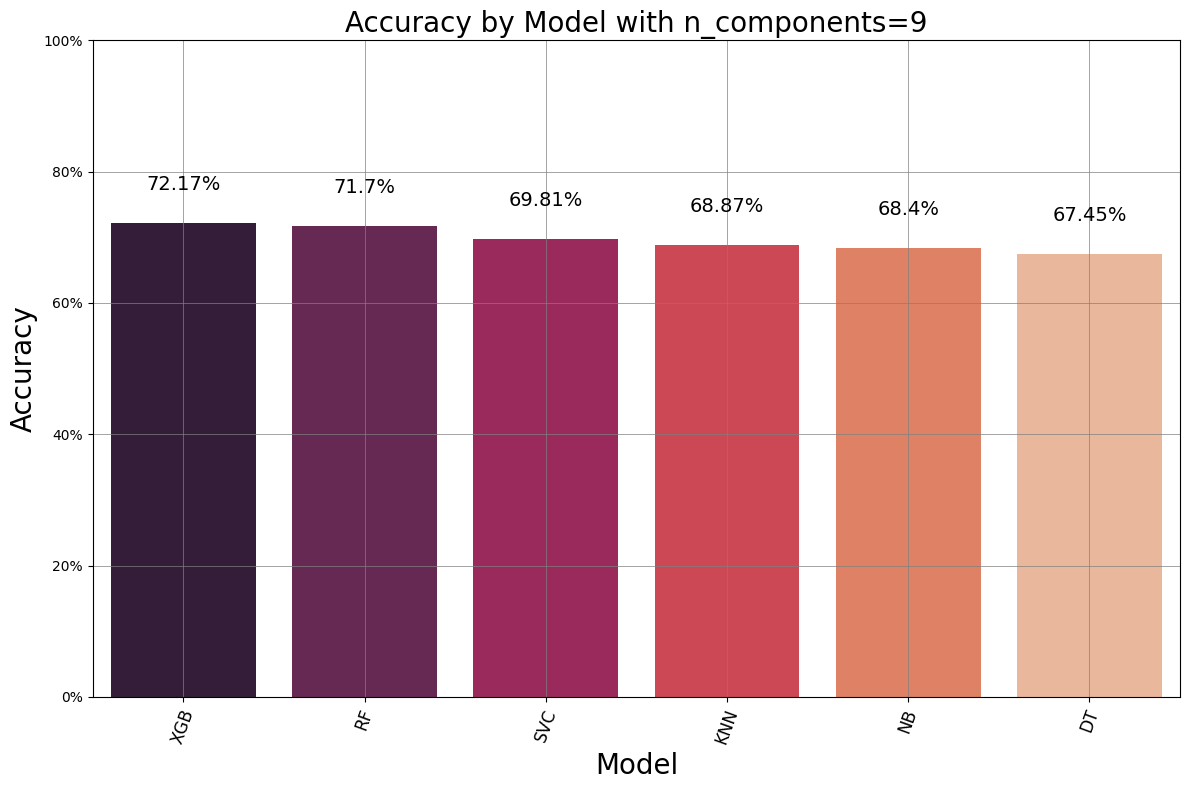

In [53]:
import matplotlib.ticker as mtick

order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title(f"Accuracy by Model with n_components={n_components}", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%',
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


# 100% Unlabeled Data CO Training

## Method 2 CO Training XGB

In [55]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)
classifier_view2 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)

# Number of iterations for co-training
num_iterations = 50


# Adaptive confidence parameters
initial_confidence = 0.7

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"XGB View (Test): {accuracy_view1:.4f}")
    print(f"XGB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_XGB_ACCURACY_100 = accuracy_view2
    else:
      MV_XGB_ACCURACY_100 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_XGB_ACCURACY_100}")


Shape of probabilities_view1: (5987, 2)
Shape of predicted_classes_view2: (5987,)
Iteration 1:
Number of instances selected for co-training: 3502
Distribution of predicted classes for View 1: [3928 2059]
XGB View (Test): 0.7358
XGB View 2 (Test): 0.7075
Shape of probabilities_view1: (2485, 2)
Shape of predicted_classes_view2: (2485,)
Iteration 2:
Number of instances selected for co-training: 568
Distribution of predicted classes for View 1: [1291 1194]
XGB View (Test): 0.7453
XGB View 2 (Test): 0.7311
Shape of probabilities_view1: (1917, 2)
Shape of predicted_classes_view2: (1917,)
Iteration 3:
Number of instances selected for co-training: 119
Distribution of predicted classes for View 1: [978 939]
XGB View (Test): 0.7500
XGB View 2 (Test): 0.7264
Shape of probabilities_view1: (1798, 2)
Shape of predicted_classes_view2: (1798,)
Iteration 4:
Number of instances selected for co-training: 118
Distribution of predicted classes for View 1: [904 894]
XGB View (Test): 0.7547
XGB View 2 (Test)

## Method 2 Co Training (SVC)

In [56]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

classifier_view1 = SVC(kernel='rbf', probability=True, random_state=42, C=10)
classifier_view2 = SVC(kernel='rbf', probability=True, random_state=42, C=10)


# Number of iterations for co-training
num_iterations = 50



# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"SVC View 1 (Test): {accuracy_view1:.4f}")
    print(f"SVC View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_SVC_ACCURACY_100 = accuracy_view2
    else:
      MV_SVC_ACCURACY_100 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break



print(f"The Best Accuracy is: {MV_SVC_ACCURACY_100}")

Shape of probabilities_view1: (5987, 2)
Shape of predicted_classes_view2: (5987,)
Iteration 1:
Number of instances selected for co-training: 2219
Distribution of predicted classes for View 1: [3330 2657]
SVC View 1 (Test): 0.7028
SVC View 2 (Test): 0.6981
Shape of probabilities_view1: (3768, 2)
Shape of predicted_classes_view2: (3768,)
Iteration 2:
Number of instances selected for co-training: 627
Distribution of predicted classes for View 1: [1490 2278]
SVC View 1 (Test): 0.7311
SVC View 2 (Test): 0.6981
Shape of probabilities_view1: (3141, 2)
Shape of predicted_classes_view2: (3141,)
Iteration 3:
Number of instances selected for co-training: 1197
Distribution of predicted classes for View 1: [1117 2024]
SVC View 1 (Test): 0.7406
SVC View 2 (Test): 0.7028
Shape of probabilities_view1: (1944, 2)
Shape of predicted_classes_view2: (1944,)
Iteration 4:
Number of instances selected for co-training: 197
Distribution of predicted classes for View 1: [994 950]
SVC View 1 (Test): 0.7311
SVC Vi

## Method 2 Co Training (RF)

In [57]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = RandomForestClassifier(n_estimators=50, random_state = 42, criterion='entropy')
classifier_view2 = RandomForestClassifier(n_estimators=50, random_state = 42, criterion='entropy')


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.7

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"RF View 1 (Test): {accuracy_view1:.4f}")
    print(f"RF View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_RF_ACCURACY_100 = accuracy_view2
    else:
      MV_RF_ACCURACY_100 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break

print(f"The Best Accuracy is: {MV_RF_ACCURACY_100}")

Shape of probabilities_view1: (5987, 2)
Shape of predicted_classes_view2: (5987,)
Iteration 1:
Number of instances selected for co-training: 3445
Distribution of predicted classes for View 1: [4062 1925]
RF View 1 (Test): 0.7453
RF View 2 (Test): 0.7170
Shape of probabilities_view1: (2542, 2)
Shape of predicted_classes_view2: (2542,)
Iteration 2:
Number of instances selected for co-training: 404
Distribution of predicted classes for View 1: [1387 1155]
RF View 1 (Test): 0.7453
RF View 2 (Test): 0.7217
Shape of probabilities_view1: (2138, 2)
Shape of predicted_classes_view2: (2138,)
Iteration 3:
Number of instances selected for co-training: 135
Distribution of predicted classes for View 1: [1065 1073]
RF View 1 (Test): 0.7594
RF View 2 (Test): 0.7264
Shape of probabilities_view1: (2003, 2)
Shape of predicted_classes_view2: (2003,)
Iteration 4:
Number of instances selected for co-training: 39
Distribution of predicted classes for View 1: [ 976 1027]
RF View 1 (Test): 0.7594
RF View 2 (Te

## Method 2 Co Training  (KNN)

In [58]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

classifier_view1 = KNeighborsClassifier(n_neighbors=1)
classifier_view2 = KNeighborsClassifier(n_neighbors=1)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"KNN View (Test): {accuracy_view1:.4f}")
    print(f"KNN View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_KNN_ACCURACY_100 = accuracy_view2
    else:
      MV_KNN_ACCURACY_100 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_KNN_ACCURACY_100}")

Shape of probabilities_view1: (5987, 2)
Shape of predicted_classes_view2: (5987,)
Iteration 1:
Number of instances selected for co-training: 4042
Distribution of predicted classes for View 1: [4134 1853]
KNN View (Test): 0.7736
KNN View 2 (Test): 0.7075
Shape of probabilities_view1: (1945, 2)
Shape of predicted_classes_view2: (1945,)
Iteration 2:
Number of instances selected for co-training: 111
Distribution of predicted classes for View 1: [985 960]
KNN View (Test): 0.7736
KNN View 2 (Test): 0.7028
Shape of probabilities_view1: (1834, 2)
Shape of predicted_classes_view2: (1834,)
Iteration 3:
Number of instances selected for co-training: 19
Distribution of predicted classes for View 1: [910 924]
KNN View (Test): 0.7783
KNN View 2 (Test): 0.7028
Shape of probabilities_view1: (1815, 2)
Shape of predicted_classes_view2: (1815,)
Iteration 4:
Number of instances selected for co-training: 7
Distribution of predicted classes for View 1: [900 915]
KNN View (Test): 0.7830
KNN View 2 (Test): 0.7

## Method 2 Co Training (DT)

In [59]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_view2 = DecisionTreeClassifier(criterion='entropy', random_state=0)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"DT View (Test): {accuracy_view1:.4f}")
    print(f"DT View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_DT_ACCURACY_100 = accuracy_view2
    else:
      MV_DT_ACCURACY_100 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_DT_ACCURACY_100}")

Shape of probabilities_view1: (5987, 2)
Shape of predicted_classes_view2: (5987,)
Iteration 1:
Number of instances selected for co-training: 3947
Distribution of predicted classes for View 1: [4053 1934]
DT View (Test): 0.7406
DT View 2 (Test): 0.7028
Shape of probabilities_view1: (2040, 2)
Shape of predicted_classes_view2: (2040,)
Iteration 2:
Number of instances selected for co-training: 277
Distribution of predicted classes for View 1: [1081  959]
DT View (Test): 0.7547
DT View 2 (Test): 0.7264
Shape of probabilities_view1: (1763, 2)
Shape of predicted_classes_view2: (1763,)
Iteration 3:
Number of instances selected for co-training: 37
Distribution of predicted classes for View 1: [855 908]
DT View (Test): 0.7642
DT View 2 (Test): 0.7123
Shape of probabilities_view1: (1726, 2)
Shape of predicted_classes_view2: (1726,)
Iteration 4:
Number of instances selected for co-training: 35
Distribution of predicted classes for View 1: [830 896]
DT View (Test): 0.7642
DT View 2 (Test): 0.7170
S

## Method 2 Co Training (NB)

In [60]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = GaussianNB()
classifier_view2 = GaussianNB()


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.7)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"NB View (Test): {accuracy_view1:.4f}")
    print(f"NB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_NB_ACCURACY_100 = accuracy_view2
    else:
      MV_NB_ACCURACY_100 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_NB_ACCURACY_100}")

Shape of probabilities_view1: (5987, 2)
Shape of predicted_classes_view2: (5987,)
Iteration 1:
Number of instances selected for co-training: 3909
Distribution of predicted classes for View 1: [3221 2766]
NB View (Test): 0.6368
NB View 2 (Test): 0.6698
Shape of probabilities_view1: (2078, 2)
Shape of predicted_classes_view2: (2078,)
Iteration 2:
Number of instances selected for co-training: 504
Distribution of predicted classes for View 1: [ 934 1144]
NB View (Test): 0.6085
NB View 2 (Test): 0.6981
Shape of probabilities_view1: (1574, 2)
Shape of predicted_classes_view2: (1574,)
Iteration 3:
Number of instances selected for co-training: 63
Distribution of predicted classes for View 1: [646 928]
NB View (Test): 0.6085
NB View 2 (Test): 0.6887
Shape of probabilities_view1: (1511, 2)
Shape of predicted_classes_view2: (1511,)
Iteration 4:
Number of instances selected for co-training: 36
Distribution of predicted classes for View 1: [616 895]
NB View (Test): 0.5991
NB View 2 (Test): 0.6745
S

## 100% Unlabeled Data Co Training Visualization

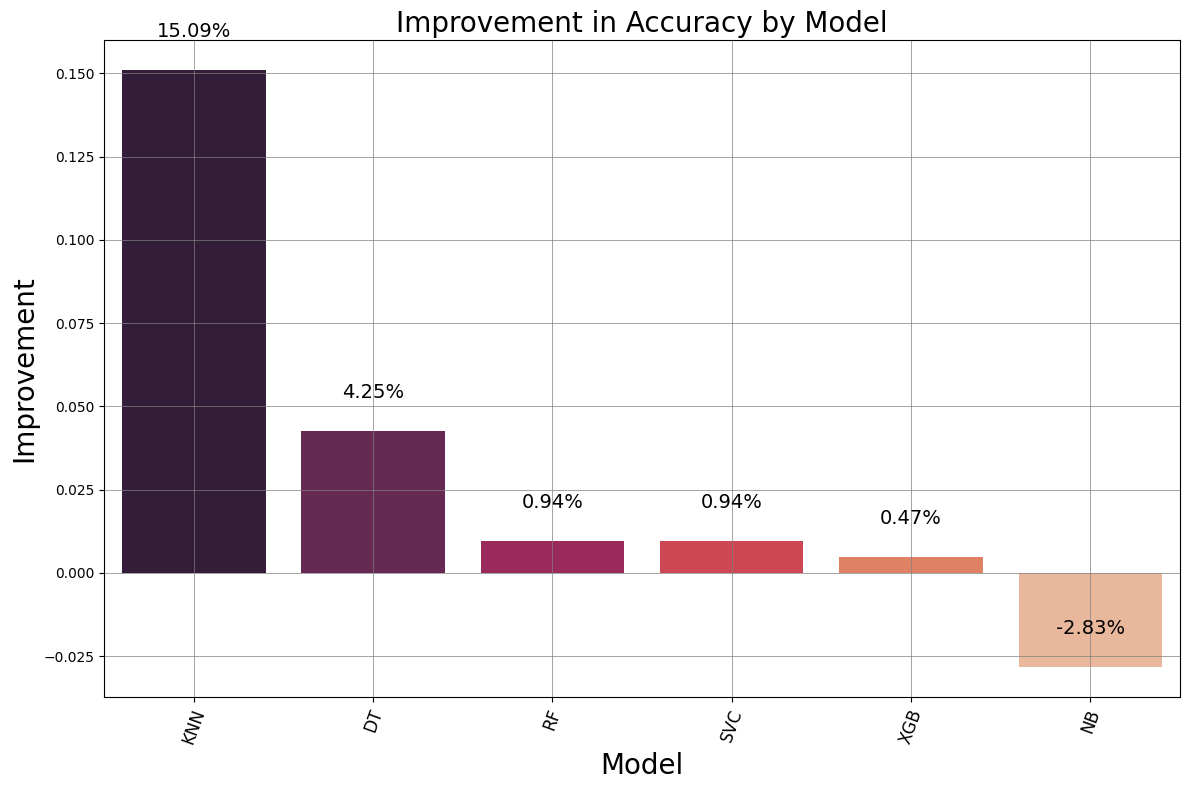

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled, Accuracy_DT_full_labeled, Accuracy_NB_full_labeled, Accuracy_RF_full_labeled, Accuracy_SVC_full_labeled, Accuracy_XGB_full_labeled]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY_100, MV_DT_ACCURACY_100, MV_NB_ACCURACY_100, MV_RF_ACCURACY_100, MV_SVC_ACCURACY_100, MV_XGB_ACCURACY_100]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()


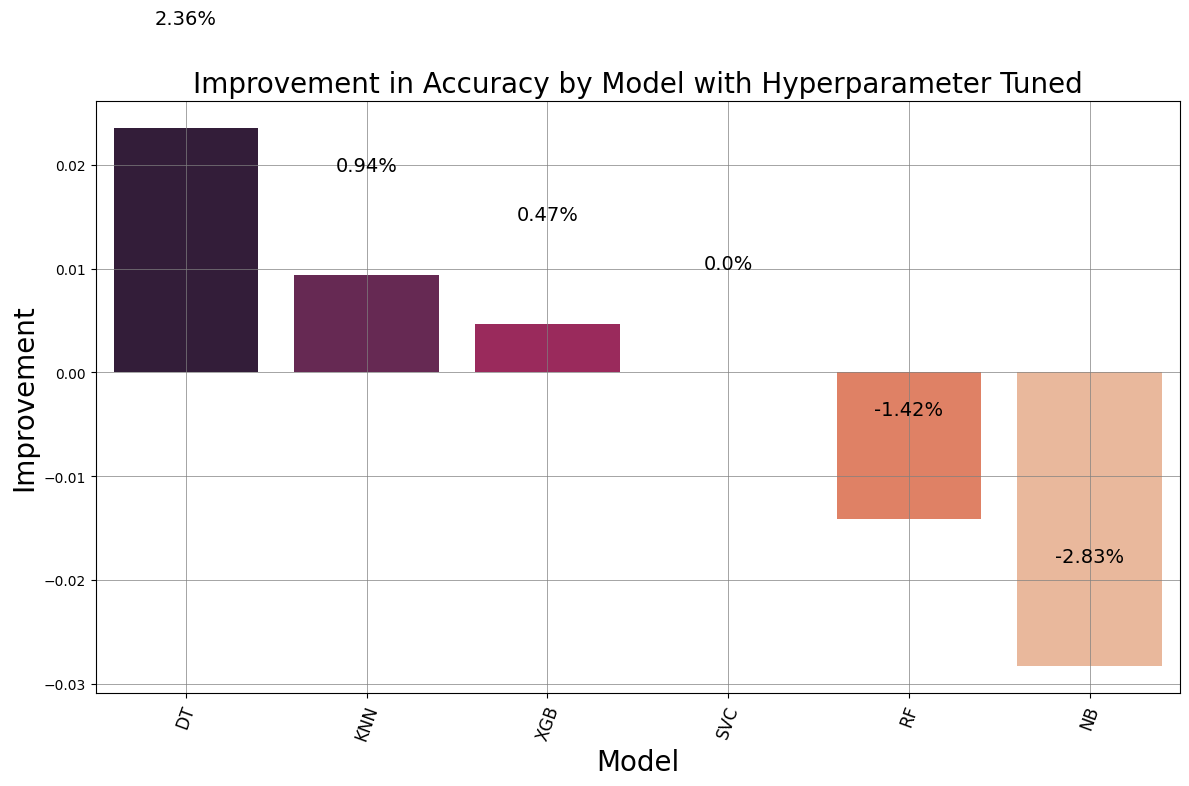

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled_tuned, Accuracy_DT_full_labeled_tuned, Accuracy_NB_full_labeled_tuned, Accuracy_RF_full_labeled_tuned, Accuracy_SVC_full_labeled_tuned, Accuracy_XGB_full_labeled_tuned]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY_100, MV_DT_ACCURACY_100, MV_NB_ACCURACY_100, MV_RF_ACCURACY_100, MV_SVC_ACCURACY_100, MV_XGB_ACCURACY_100]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model with Hyperparameter Tuned", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()


# 50% Unlabeled Data Co Training

## CO Training XGB

In [63]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)
classifier_view2 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)

# Number of iterations for co-training
num_iterations = 50


# Adaptive confidence parameters
initial_confidence = 0.7

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"XGB View (Test): {accuracy_view1:.4f}")
    print(f"XGB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_XGB_ACCURACY_50 = accuracy_view2
    else:
      MV_XGB_ACCURACY_50 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_XGB_ACCURACY_50}")


Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 1767
Distribution of predicted classes for View 1: [1906 1088]
XGB View (Test): 0.7358
XGB View 2 (Test): 0.7075
Shape of probabilities_view1: (1227, 2)
Shape of predicted_classes_view2: (1227,)
Iteration 2:
Number of instances selected for co-training: 235
Distribution of predicted classes for View 1: [620 607]
XGB View (Test): 0.7453
XGB View 2 (Test): 0.7264
Shape of probabilities_view1: (992, 2)
Shape of predicted_classes_view2: (992,)
Iteration 3:
Number of instances selected for co-training: 66
Distribution of predicted classes for View 1: [486 506]
XGB View (Test): 0.7453
XGB View 2 (Test): 0.7264
Shape of probabilities_view1: (926, 2)
Shape of predicted_classes_view2: (926,)
Iteration 4:
Number of instances selected for co-training: 46
Distribution of predicted classes for View 1: [443 483]
XGB View (Test): 0.7453
XGB View 2 (Test): 0.7311

## Co Training SVC

In [64]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

classifier_view1 = SVC(kernel='rbf', probability=True, random_state=42, C=10)
classifier_view2 = SVC(kernel='rbf', probability=True, random_state=42, C=10)


# Number of iterations for co-training
num_iterations = 50



# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"SVC View 1 (Test): {accuracy_view1:.4f}")
    print(f"SVC View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_SVC_ACCURACY_50 = accuracy_view2
    else:
      MV_SVC_ACCURACY_50 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break



print(f"The Best Accuracy is: {MV_SVC_ACCURACY_50}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 1116
Distribution of predicted classes for View 1: [1659 1335]
SVC View 1 (Test): 0.7028
SVC View 2 (Test): 0.6981
Shape of probabilities_view1: (1878, 2)
Shape of predicted_classes_view2: (1878,)
Iteration 2:
Number of instances selected for co-training: 223
Distribution of predicted classes for View 1: [ 684 1194]
SVC View 1 (Test): 0.7311
SVC View 2 (Test): 0.6934
Shape of probabilities_view1: (1655, 2)
Shape of predicted_classes_view2: (1655,)
Iteration 3:
Number of instances selected for co-training: 108
Distribution of predicted classes for View 1: [ 560 1095]
SVC View 1 (Test): 0.7406
SVC View 2 (Test): 0.6981
Shape of probabilities_view1: (1547, 2)
Shape of predicted_classes_view2: (1547,)
Iteration 4:
Number of instances selected for co-training: 542
Distribution of predicted classes for View 1: [ 514 1033]
SVC View 1 (Test): 0.7406
SVC V

## Co Training RF

In [65]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]


X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = RandomForestClassifier(n_estimators=50, random_state = 42, criterion='entropy')
classifier_view2 = RandomForestClassifier(n_estimators=50, random_state = 42, criterion='entropy')


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.7

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"RF View 1 (Test): {accuracy_view1:.4f}")
    print(f"RF View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_RF_ACCURACY_50 = accuracy_view2
    else:
      MV_RF_ACCURACY_50 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break

print(f"The Best Accuracy is: {MV_RF_ACCURACY_50}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 1737
Distribution of predicted classes for View 1: [2024  970]
RF View 1 (Test): 0.7500
RF View 2 (Test): 0.7170
Shape of probabilities_view1: (1257, 2)
Shape of predicted_classes_view2: (1257,)
Iteration 2:
Number of instances selected for co-training: 161
Distribution of predicted classes for View 1: [692 565]
RF View 1 (Test): 0.7500
RF View 2 (Test): 0.7264
Shape of probabilities_view1: (1096, 2)
Shape of predicted_classes_view2: (1096,)
Iteration 3:
Number of instances selected for co-training: 68
Distribution of predicted classes for View 1: [563 533]
RF View 1 (Test): 0.7547
RF View 2 (Test): 0.7217
Shape of probabilities_view1: (1028, 2)
Shape of predicted_classes_view2: (1028,)
Iteration 4:
Number of instances selected for co-training: 26
Distribution of predicted classes for View 1: [506 522]
RF View 1 (Test): 0.7500
RF View 2 (Test): 0.

## Co Training KNN

In [66]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

classifier_view1 = KNeighborsClassifier(n_neighbors=1)
classifier_view2 = KNeighborsClassifier(n_neighbors=1)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"KNN View (Test): {accuracy_view1:.4f}")
    print(f"KNN View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_KNN_ACCURACY_50 = accuracy_view2
    else:
      MV_KNN_ACCURACY_50 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_KNN_ACCURACY_50}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 2006
Distribution of predicted classes for View 1: [2032  962]
KNN View (Test): 0.7547
KNN View 2 (Test): 0.7075
Shape of probabilities_view1: (988, 2)
Shape of predicted_classes_view2: (988,)
Iteration 2:
Number of instances selected for co-training: 50
Distribution of predicted classes for View 1: [500 488]
KNN View (Test): 0.7547
KNN View 2 (Test): 0.6981
Shape of probabilities_view1: (938, 2)
Shape of predicted_classes_view2: (938,)
Iteration 3:
Number of instances selected for co-training: 14
Distribution of predicted classes for View 1: [461 477]
KNN View (Test): 0.7547
KNN View 2 (Test): 0.6981
Shape of probabilities_view1: (924, 2)
Shape of predicted_classes_view2: (924,)
Iteration 4:
Number of instances selected for co-training: 6
Distribution of predicted classes for View 1: [452 472]
KNN View (Test): 0.7500
KNN View 2 (Test): 0.6981
Sha

## Co Training DT

In [67]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_view2 = DecisionTreeClassifier(criterion='entropy', random_state=0)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"DT View (Test): {accuracy_view1:.4f}")
    print(f"DT View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_DT_ACCURACY_50 = accuracy_view2
    else:
      MV_DT_ACCURACY_50 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_DT_ACCURACY_50}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 1980
Distribution of predicted classes for View 1: [2014  980]
DT View (Test): 0.7547
DT View 2 (Test): 0.7028
Shape of probabilities_view1: (1014, 2)
Shape of predicted_classes_view2: (1014,)
Iteration 2:
Number of instances selected for co-training: 171
Distribution of predicted classes for View 1: [564 450]
DT View (Test): 0.7453
DT View 2 (Test): 0.7075
Shape of probabilities_view1: (843, 2)
Shape of predicted_classes_view2: (843,)
Iteration 3:
Number of instances selected for co-training: 25
Distribution of predicted classes for View 1: [420 423]
DT View (Test): 0.7689
DT View 2 (Test): 0.7170
Shape of probabilities_view1: (818, 2)
Shape of predicted_classes_view2: (818,)
Iteration 4:
Number of instances selected for co-training: 10
Distribution of predicted classes for View 1: [406 412]
DT View (Test): 0.7736
DT View 2 (Test): 0.7075
Shape o

## Co Training NB

In [68]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = GaussianNB()
classifier_view2 = GaussianNB()


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.7)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"NB View (Test): {accuracy_view1:.4f}")
    print(f"NB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_NB_ACCURACY_50 = accuracy_view2
    else:
      MV_NB_ACCURACY_50 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_NB_ACCURACY_50}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 1973
Distribution of predicted classes for View 1: [1574 1420]
NB View (Test): 0.6415
NB View 2 (Test): 0.6698
Shape of probabilities_view1: (1021, 2)
Shape of predicted_classes_view2: (1021,)
Iteration 2:
Number of instances selected for co-training: 223
Distribution of predicted classes for View 1: [466 555]
NB View (Test): 0.6132
NB View 2 (Test): 0.6887
Shape of probabilities_view1: (798, 2)
Shape of predicted_classes_view2: (798,)
Iteration 3:
Number of instances selected for co-training: 34
Distribution of predicted classes for View 1: [342 456]
NB View (Test): 0.6038
NB View 2 (Test): 0.6840
Shape of probabilities_view1: (764, 2)
Shape of predicted_classes_view2: (764,)
Iteration 4:
Number of instances selected for co-training: 12
Distribution of predicted classes for View 1: [325 439]
NB View (Test): 0.5991
NB View 2 (Test): 0.6745
Shape o

## 50% Unlabeled Data Co Training Visualization

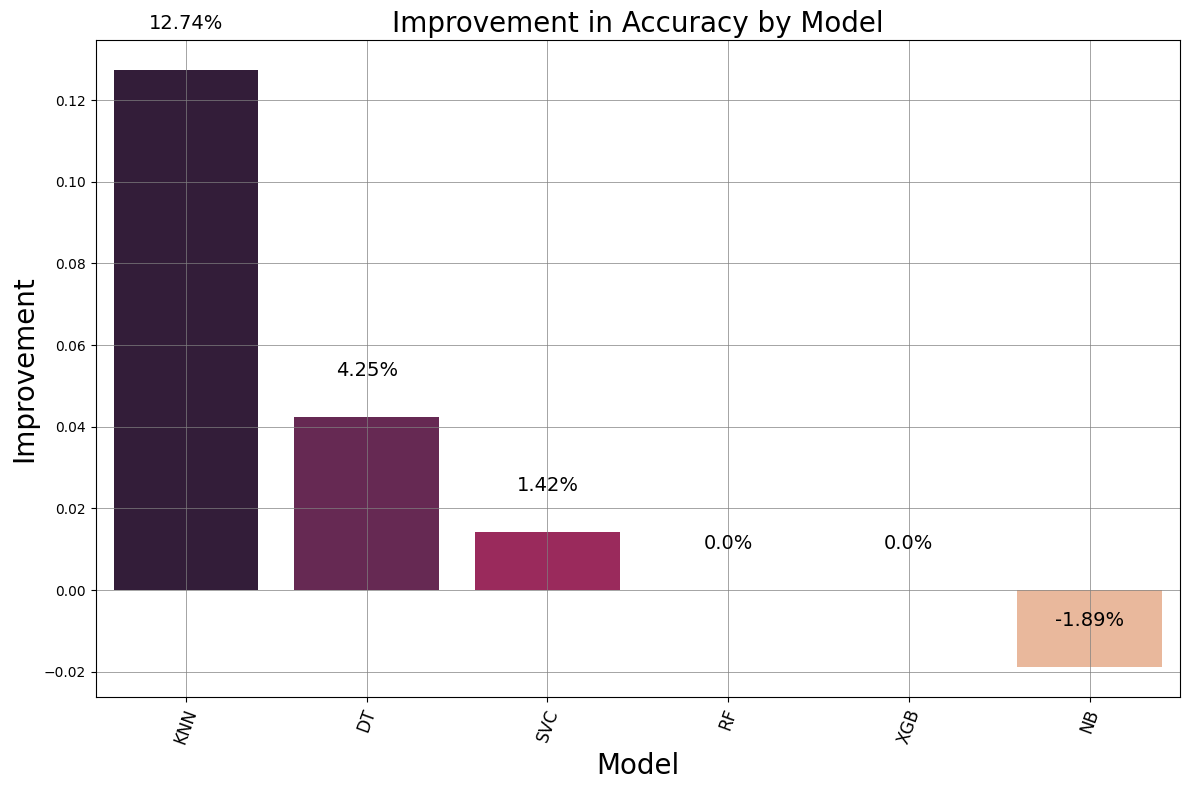

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled, Accuracy_DT_full_labeled, Accuracy_NB_full_labeled, Accuracy_RF_full_labeled, Accuracy_SVC_full_labeled, Accuracy_XGB_full_labeled]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY_50, MV_DT_ACCURACY_50, MV_NB_ACCURACY_50, MV_RF_ACCURACY_50, MV_SVC_ACCURACY_50, MV_XGB_ACCURACY_50]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()


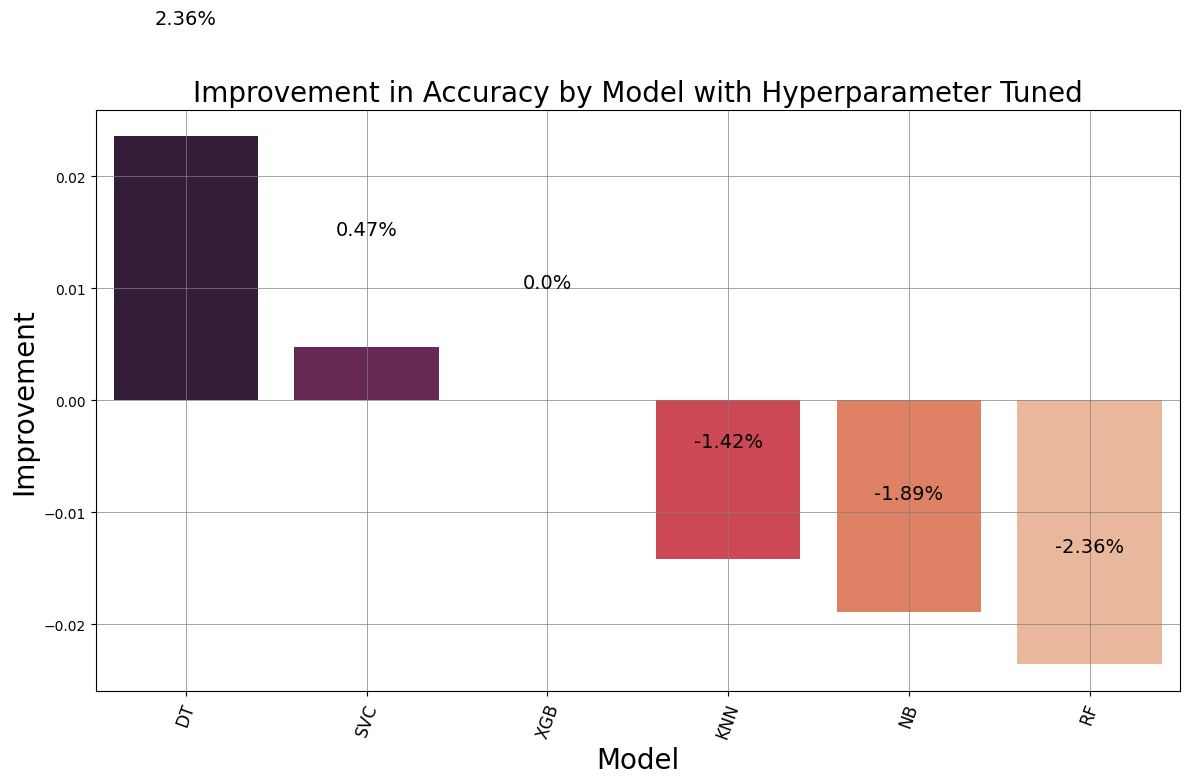

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled_tuned, Accuracy_DT_full_labeled_tuned, Accuracy_NB_full_labeled_tuned, Accuracy_RF_full_labeled_tuned, Accuracy_SVC_full_labeled_tuned, Accuracy_XGB_full_labeled_tuned]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY_50, MV_DT_ACCURACY_50, MV_NB_ACCURACY_50, MV_RF_ACCURACY_50, MV_SVC_ACCURACY_50, MV_XGB_ACCURACY_50]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model with Hyperparameter Tuned", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()


# 20% Unlabeled Data Co Training

## Co Training XGB

In [71]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.2, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)
classifier_view2 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)

# Number of iterations for co-training
num_iterations = 50


# Adaptive confidence parameters
initial_confidence = 0.7

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"XGB View (Test): {accuracy_view1:.4f}")
    print(f"XGB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_XGB_ACCURACY_20 = accuracy_view2
    else:
      MV_XGB_ACCURACY_20 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_XGB_ACCURACY_20}")


Shape of probabilities_view1: (1197, 2)
Shape of predicted_classes_view2: (1197,)
Iteration 1:
Number of instances selected for co-training: 705
Distribution of predicted classes for View 1: [746 451]
XGB View (Test): 0.7500
XGB View 2 (Test): 0.7075
Shape of probabilities_view1: (492, 2)
Shape of predicted_classes_view2: (492,)
Iteration 2:
Number of instances selected for co-training: 82
Distribution of predicted classes for View 1: [232 260]
XGB View (Test): 0.7594
XGB View 2 (Test): 0.7358
Shape of probabilities_view1: (410, 2)
Shape of predicted_classes_view2: (410,)
Iteration 3:
Number of instances selected for co-training: 27
Distribution of predicted classes for View 1: [187 223]
XGB View (Test): 0.7642
XGB View 2 (Test): 0.7547
Shape of probabilities_view1: (383, 2)
Shape of predicted_classes_view2: (383,)
Iteration 4:
Number of instances selected for co-training: 22
Distribution of predicted classes for View 1: [174 209]
XGB View (Test): 0.7783
XGB View 2 (Test): 0.7500
Shape

## Co Training SVC

In [72]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

classifier_view1 = SVC(kernel='rbf', probability=True, random_state=42, C=10)
classifier_view2 = SVC(kernel='rbf', probability=True, random_state=42, C=10)


# Number of iterations for co-training
num_iterations = 50



# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"SVC View 1 (Test): {accuracy_view1:.4f}")
    print(f"SVC View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_SVC_ACCURACY_20 = accuracy_view2
    else:
      MV_SVC_ACCURACY_20 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break



print(f"The Best Accuracy is: {MV_SVC_ACCURACY_20}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 1101
Distribution of predicted classes for View 1: [1638 1356]
SVC View 1 (Test): 0.7028
SVC View 2 (Test): 0.6981
Shape of probabilities_view1: (1893, 2)
Shape of predicted_classes_view2: (1893,)
Iteration 2:
Number of instances selected for co-training: 189
Distribution of predicted classes for View 1: [ 699 1194]
SVC View 1 (Test): 0.7311
SVC View 2 (Test): 0.6981
Shape of probabilities_view1: (1704, 2)
Shape of predicted_classes_view2: (1704,)
Iteration 3:
Number of instances selected for co-training: 88
Distribution of predicted classes for View 1: [ 572 1132]
SVC View 1 (Test): 0.7406
SVC View 2 (Test): 0.6981
Shape of probabilities_view1: (1616, 2)
Shape of predicted_classes_view2: (1616,)
Iteration 4:
Number of instances selected for co-training: 475
Distribution of predicted classes for View 1: [ 531 1085]
SVC View 1 (Test): 0.7406
SVC Vi

## Co Training RF

In [73]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]


X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = RandomForestClassifier(n_estimators=50, random_state = 42, criterion='entropy')
classifier_view2 = RandomForestClassifier(n_estimators=50, random_state = 42, criterion='entropy')


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.7

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"RF View 1 (Test): {accuracy_view1:.4f}")
    print(f"RF View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_RF_ACCURACY_20 = accuracy_view2
    else:
      MV_RF_ACCURACY_20 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break

print(f"The Best Accuracy is: {MV_RF_ACCURACY_20}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 1725
Distribution of predicted classes for View 1: [1995  999]
RF View 1 (Test): 0.7453
RF View 2 (Test): 0.7170
Shape of probabilities_view1: (1269, 2)
Shape of predicted_classes_view2: (1269,)
Iteration 2:
Number of instances selected for co-training: 185
Distribution of predicted classes for View 1: [685 584]
RF View 1 (Test): 0.7500
RF View 2 (Test): 0.7311
Shape of probabilities_view1: (1084, 2)
Shape of predicted_classes_view2: (1084,)
Iteration 3:
Number of instances selected for co-training: 48
Distribution of predicted classes for View 1: [534 550]
RF View 1 (Test): 0.7406
RF View 2 (Test): 0.7264
Shape of probabilities_view1: (1036, 2)
Shape of predicted_classes_view2: (1036,)
Iteration 4:
Number of instances selected for co-training: 20
Distribution of predicted classes for View 1: [499 537]
RF View 1 (Test): 0.7453
RF View 2 (Test): 0.

## Co Training KNN

In [74]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

classifier_view1 = KNeighborsClassifier(n_neighbors=1)
classifier_view2 = KNeighborsClassifier(n_neighbors=1)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"KNN View (Test): {accuracy_view1:.4f}")
    print(f"KNN View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_KNN_ACCURACY_20 = accuracy_view2
    else:
      MV_KNN_ACCURACY_20 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_KNN_ACCURACY_20}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 2014
Distribution of predicted classes for View 1: [2043  951]
KNN View (Test): 0.7547
KNN View 2 (Test): 0.7123
Shape of probabilities_view1: (980, 2)
Shape of predicted_classes_view2: (980,)
Iteration 2:
Number of instances selected for co-training: 54
Distribution of predicted classes for View 1: [493 487]
KNN View (Test): 0.7594
KNN View 2 (Test): 0.6981
Shape of probabilities_view1: (926, 2)
Shape of predicted_classes_view2: (926,)
Iteration 3:
Number of instances selected for co-training: 10
Distribution of predicted classes for View 1: [455 471]
KNN View (Test): 0.7642
KNN View 2 (Test): 0.6981
Shape of probabilities_view1: (916, 2)
Shape of predicted_classes_view2: (916,)
Iteration 4:
Number of instances selected for co-training: 6
Distribution of predicted classes for View 1: [456 460]
KNN View (Test): 0.7736
KNN View 2 (Test): 0.6981
Sha

## Co Training DT

In [75]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_view2 = DecisionTreeClassifier(criterion='entropy', random_state=0)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"DT View (Test): {accuracy_view1:.4f}")
    print(f"DT View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_DT_ACCURACY_20 = accuracy_view2
    else:
      MV_DT_ACCURACY_20 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_DT_ACCURACY_20}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 1988
Distribution of predicted classes for View 1: [2009  985]
DT View (Test): 0.7311
DT View 2 (Test): 0.7028
Shape of probabilities_view1: (1006, 2)
Shape of predicted_classes_view2: (1006,)
Iteration 2:
Number of instances selected for co-training: 139
Distribution of predicted classes for View 1: [541 465]
DT View (Test): 0.7594
DT View 2 (Test): 0.6981
Shape of probabilities_view1: (867, 2)
Shape of predicted_classes_view2: (867,)
Iteration 3:
Number of instances selected for co-training: 32
Distribution of predicted classes for View 1: [429 438]
DT View (Test): 0.7500
DT View 2 (Test): 0.7028
Shape of probabilities_view1: (835, 2)
Shape of predicted_classes_view2: (835,)
Iteration 4:
Number of instances selected for co-training: 33
Distribution of predicted classes for View 1: [421 414]
DT View (Test): 0.7500
DT View 2 (Test): 0.6934
Shape o

## Co Training NB

In [76]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.5, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = GaussianNB()
classifier_view2 = GaussianNB()


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.7)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"NB View (Test): {accuracy_view1:.4f}")
    print(f"NB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_NB_ACCURACY_20 = accuracy_view2
    else:
      MV_NB_ACCURACY_20 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_NB_ACCURACY_20}")

Shape of probabilities_view1: (2994, 2)
Shape of predicted_classes_view2: (2994,)
Iteration 1:
Number of instances selected for co-training: 1973
Distribution of predicted classes for View 1: [1574 1420]
NB View (Test): 0.6415
NB View 2 (Test): 0.6698
Shape of probabilities_view1: (1021, 2)
Shape of predicted_classes_view2: (1021,)
Iteration 2:
Number of instances selected for co-training: 223
Distribution of predicted classes for View 1: [466 555]
NB View (Test): 0.6132
NB View 2 (Test): 0.6887
Shape of probabilities_view1: (798, 2)
Shape of predicted_classes_view2: (798,)
Iteration 3:
Number of instances selected for co-training: 34
Distribution of predicted classes for View 1: [342 456]
NB View (Test): 0.6038
NB View 2 (Test): 0.6840
Shape of probabilities_view1: (764, 2)
Shape of predicted_classes_view2: (764,)
Iteration 4:
Number of instances selected for co-training: 12
Distribution of predicted classes for View 1: [325 439]
NB View (Test): 0.5991
NB View 2 (Test): 0.6745
Shape o

## 20% Unlabeled Data Co Training Visualization

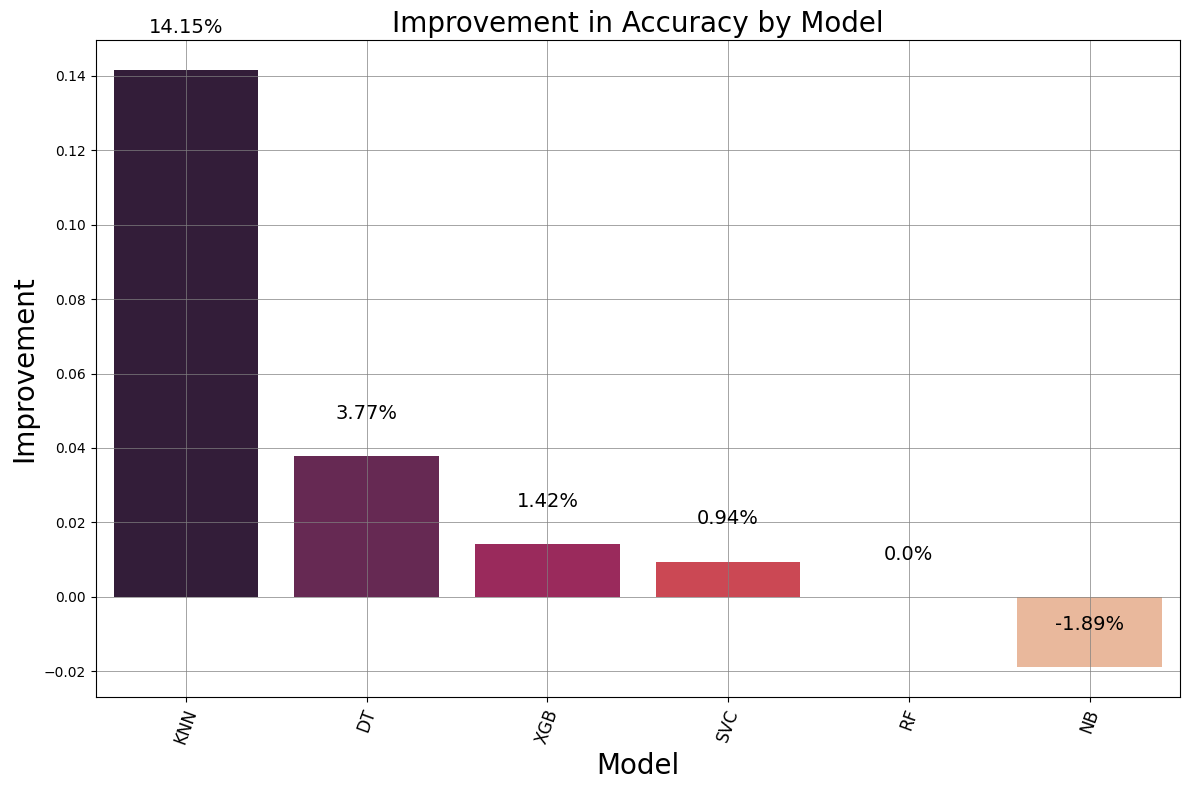

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled, Accuracy_DT_full_labeled, Accuracy_NB_full_labeled, Accuracy_RF_full_labeled, Accuracy_SVC_full_labeled, Accuracy_XGB_full_labeled]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY_20, MV_DT_ACCURACY_20, MV_NB_ACCURACY_20, MV_RF_ACCURACY_20, MV_SVC_ACCURACY_20, MV_XGB_ACCURACY_20]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()


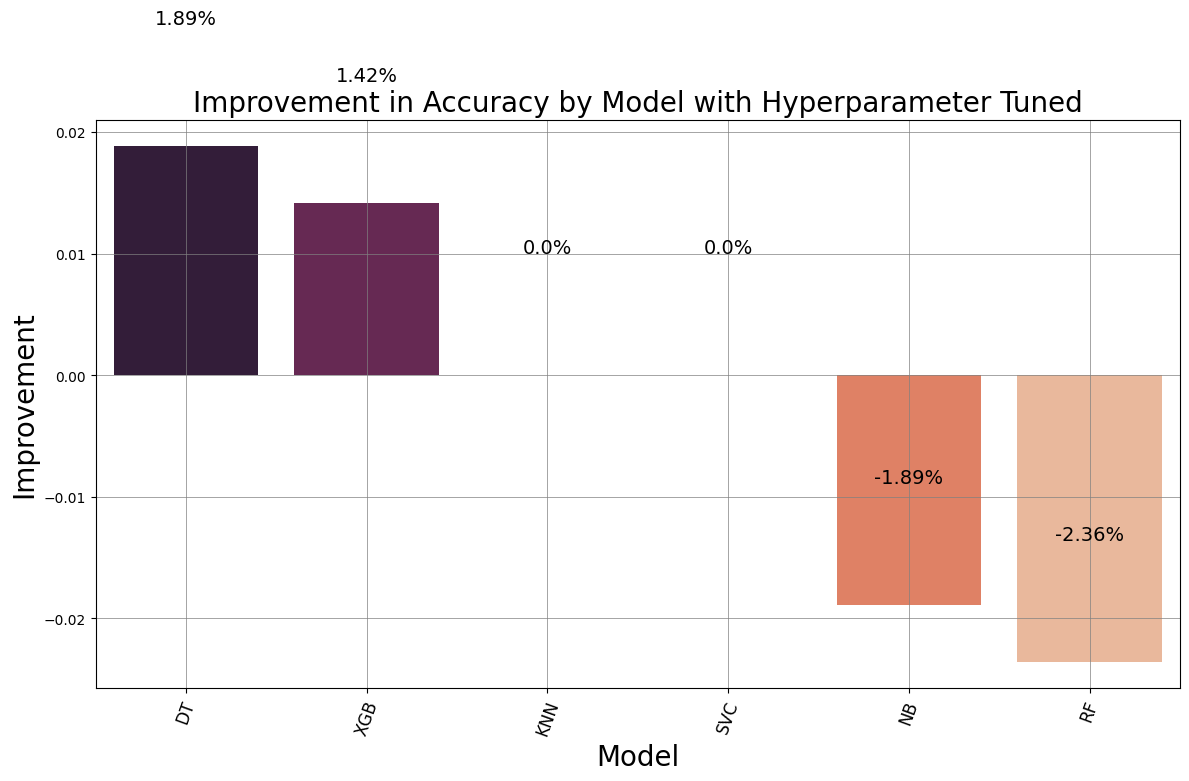

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled_tuned, Accuracy_DT_full_labeled_tuned, Accuracy_NB_full_labeled_tuned, Accuracy_RF_full_labeled_tuned, Accuracy_SVC_full_labeled_tuned, Accuracy_XGB_full_labeled_tuned]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY_20, MV_DT_ACCURACY_20, MV_NB_ACCURACY_20, MV_RF_ACCURACY_20, MV_SVC_ACCURACY_20, MV_XGB_ACCURACY_20]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model with Hyperparameter Tuned", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()


# 10% Unlabeled Data Co Training

## Co Training XGB

In [79]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.1, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)
classifier_view2 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)

# Number of iterations for co-training
num_iterations = 50


# Adaptive confidence parameters
initial_confidence = 0.7

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"XGB View (Test): {accuracy_view1:.4f}")
    print(f"XGB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_XGB_ACCURACY_10 = accuracy_view2
    else:
      MV_XGB_ACCURACY_10 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_XGB_ACCURACY_10}")


Shape of probabilities_view1: (599, 2)
Shape of predicted_classes_view2: (599,)
Iteration 1:
Number of instances selected for co-training: 356
Distribution of predicted classes for View 1: [360 239]
XGB View (Test): 0.7358
XGB View 2 (Test): 0.7075
Shape of probabilities_view1: (243, 2)
Shape of predicted_classes_view2: (243,)
Iteration 2:
Number of instances selected for co-training: 36
Distribution of predicted classes for View 1: [105 138]
XGB View (Test): 0.7453
XGB View 2 (Test): 0.7217
Shape of probabilities_view1: (207, 2)
Shape of predicted_classes_view2: (207,)
Iteration 3:
Number of instances selected for co-training: 8
Distribution of predicted classes for View 1: [ 81 126]
XGB View (Test): 0.7547
XGB View 2 (Test): 0.7547
Shape of probabilities_view1: (199, 2)
Shape of predicted_classes_view2: (199,)
Iteration 4:
Number of instances selected for co-training: 11
Distribution of predicted classes for View 1: [ 78 121]
XGB View (Test): 0.7642
XGB View 2 (Test): 0.7311
Shape of

## Co Training SVC

In [80]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.1, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

classifier_view1 = SVC(kernel='rbf', probability=True, random_state=42, C=10)
classifier_view2 = SVC(kernel='rbf', probability=True, random_state=42, C=10)


# Number of iterations for co-training
num_iterations = 50



# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"SVC View 1 (Test): {accuracy_view1:.4f}")
    print(f"SVC View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_SVC_ACCURACY_10 = accuracy_view2
    else:
      MV_SVC_ACCURACY_10 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break



print(f"The Best Accuracy is: {MV_SVC_ACCURACY_10}")

Shape of probabilities_view1: (599, 2)
Shape of predicted_classes_view2: (599,)
Iteration 1:
Number of instances selected for co-training: 218
Distribution of predicted classes for View 1: [312 287]
SVC View 1 (Test): 0.7028
SVC View 2 (Test): 0.6981
Shape of probabilities_view1: (381, 2)
Shape of predicted_classes_view2: (381,)
Iteration 2:
Number of instances selected for co-training: 16
Distribution of predicted classes for View 1: [117 264]
SVC View 1 (Test): 0.7217
SVC View 2 (Test): 0.6887
Shape of probabilities_view1: (365, 2)
Shape of predicted_classes_view2: (365,)
Iteration 3:
Number of instances selected for co-training: 1
Distribution of predicted classes for View 1: [103 262]
SVC View 1 (Test): 0.7264
SVC View 2 (Test): 0.6887
Shape of probabilities_view1: (364, 2)
Shape of predicted_classes_view2: (364,)
Iteration 4:
Number of instances selected for co-training: 0
Distribution of predicted classes for View 1: [102 262]
SVC View 1 (Test): 0.7264
SVC View 2 (Test): 0.6887
T

## Co Training RF

In [81]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.1, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]


X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = RandomForestClassifier(n_estimators=50, random_state = 42, criterion='entropy')
classifier_view2 = RandomForestClassifier(n_estimators=50, random_state = 42, criterion='entropy')


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.7

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"RF View 1 (Test): {accuracy_view1:.4f}")
    print(f"RF View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_RF_ACCURACY_10 = accuracy_view2
    else:
      MV_RF_ACCURACY_10 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break

print(f"The Best Accuracy is: {MV_RF_ACCURACY_10}")

Shape of probabilities_view1: (599, 2)
Shape of predicted_classes_view2: (599,)
Iteration 1:
Number of instances selected for co-training: 350
Distribution of predicted classes for View 1: [393 206]
RF View 1 (Test): 0.7453
RF View 2 (Test): 0.7170
Shape of probabilities_view1: (249, 2)
Shape of predicted_classes_view2: (249,)
Iteration 2:
Number of instances selected for co-training: 27
Distribution of predicted classes for View 1: [125 124]
RF View 1 (Test): 0.7500
RF View 2 (Test): 0.7217
Shape of probabilities_view1: (222, 2)
Shape of predicted_classes_view2: (222,)
Iteration 3:
Number of instances selected for co-training: 11
Distribution of predicted classes for View 1: [106 116]
RF View 1 (Test): 0.7594
RF View 2 (Test): 0.7217
Shape of probabilities_view1: (211, 2)
Shape of predicted_classes_view2: (211,)
Iteration 4:
Number of instances selected for co-training: 1
Distribution of predicted classes for View 1: [ 98 113]
RF View 1 (Test): 0.7594
RF View 2 (Test): 0.7123
Shape of

## Co Training KNN

In [82]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.1, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

classifier_view1 = KNeighborsClassifier(n_neighbors=1)
classifier_view2 = KNeighborsClassifier(n_neighbors=1)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"KNN View (Test): {accuracy_view1:.4f}")
    print(f"KNN View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_KNN_ACCURACY_10 = accuracy_view2
    else:
      MV_KNN_ACCURACY_10 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_KNN_ACCURACY_10}")

Shape of probabilities_view1: (599, 2)
Shape of predicted_classes_view2: (599,)
Iteration 1:
Number of instances selected for co-training: 415
Distribution of predicted classes for View 1: [408 191]
KNN View (Test): 0.7689
KNN View 2 (Test): 0.7123
Shape of probabilities_view1: (184, 2)
Shape of predicted_classes_view2: (184,)
Iteration 2:
Number of instances selected for co-training: 16
Distribution of predicted classes for View 1: [88 96]
KNN View (Test): 0.7689
KNN View 2 (Test): 0.7123
Shape of probabilities_view1: (168, 2)
Shape of predicted_classes_view2: (168,)
Iteration 3:
Number of instances selected for co-training: 3
Distribution of predicted classes for View 1: [79 89]
KNN View (Test): 0.7830
KNN View 2 (Test): 0.7075
Shape of probabilities_view1: (165, 2)
Shape of predicted_classes_view2: (165,)
Iteration 4:
Number of instances selected for co-training: 0
Distribution of predicted classes for View 1: [77 88]
KNN View (Test): 0.7783
KNN View 2 (Test): 0.7075
The Best Accura

## Co Training DT

In [83]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.1, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_view2 = DecisionTreeClassifier(criterion='entropy', random_state=0)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"DT View (Test): {accuracy_view1:.4f}")
    print(f"DT View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_DT_ACCURACY_10 = accuracy_view2
    else:
      MV_DT_ACCURACY_10 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_DT_ACCURACY_10}")

Shape of probabilities_view1: (599, 2)
Shape of predicted_classes_view2: (599,)
Iteration 1:
Number of instances selected for co-training: 402
Distribution of predicted classes for View 1: [398 201]
DT View (Test): 0.7358
DT View 2 (Test): 0.7028
Shape of probabilities_view1: (197, 2)
Shape of predicted_classes_view2: (197,)
Iteration 2:
Number of instances selected for co-training: 31
Distribution of predicted classes for View 1: [99 98]
DT View (Test): 0.7594
DT View 2 (Test): 0.6745
Shape of probabilities_view1: (166, 2)
Shape of predicted_classes_view2: (166,)
Iteration 3:
Number of instances selected for co-training: 8
Distribution of predicted classes for View 1: [76 90]
DT View (Test): 0.7547
DT View 2 (Test): 0.6840
Shape of probabilities_view1: (158, 2)
Shape of predicted_classes_view2: (158,)
Iteration 4:
Number of instances selected for co-training: 0
Distribution of predicted classes for View 1: [71 87]
DT View (Test): 0.7594
DT View 2 (Test): 0.6840
The Best Accuracy is: 0

## Co Training NB

In [84]:
# Select 50% of unlabeled data randomly
unlabeled_data_sampled = unlabeled_data.sample(frac=0.1, random_state=42)


view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data_sampled[view1_column_names]
view2_dataset_unlabeled = unlabeled_data_sampled[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding Independent Variables
label_encoder_x = LabelEncoder()

# Apply Label Encoding to binary variables
binary_columns_view1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines' ,'OnlineSecurity', 'OnlineBackup']
binary_columns_view2 = ['DeviceProtection', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binary_columns_view1:
    X_view1_dataset[column] = label_encoder.fit_transform(X_view1_dataset[column])
    X_view1_dataset_unlabeled[column] = label_encoder.transform(X_view1_dataset_unlabeled[column])

for column in binary_columns_view2:
    X_view2_dataset[column] = label_encoder.fit_transform(X_view2_dataset[column])
    X_view2_dataset_unlabeled[column] = label_encoder.transform(X_view2_dataset_unlabeled[column])

# Apply One-Hot Encoding to variables with more than two categories
categorical_columns_view1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

categorical_columns_view2 = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Convert 'TotalCharges' to numeric, handling errors by setting them to NaN

X_view1_dataset = pd.get_dummies(X_view1_dataset, columns=categorical_columns_view1, drop_first=True)
X_view1_dataset_unlabeled = pd.get_dummies(X_view1_dataset_unlabeled, columns=categorical_columns_view1, drop_first=True)

X_view2_dataset = pd.get_dummies(X_view2_dataset, columns=categorical_columns_view2, drop_first=True)
X_view2_dataset_unlabeled = pd.get_dummies(X_view2_dataset_unlabeled, columns=categorical_columns_view2, drop_first=True)

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


X_view2_train = X_view2_train.drop(columns=['TotalCharges'])
X_view2_test = X_view2_test.drop(columns=['TotalCharges'])
X_view2_unlabeled = X_view2_unlabeled.drop(columns=['TotalCharges'])

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = GaussianNB()
classifier_view2 = GaussianNB()


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.7)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"NB View (Test): {accuracy_view1:.4f}")
    print(f"NB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_NB_ACCURACY_10 = accuracy_view2
    else:
      MV_NB_ACCURACY_10 = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_NB_ACCURACY_10}")

Shape of probabilities_view1: (599, 2)
Shape of predicted_classes_view2: (599,)
Iteration 1:
Number of instances selected for co-training: 402
Distribution of predicted classes for View 1: [298 301]
NB View (Test): 0.6368
NB View 2 (Test): 0.6698
Shape of probabilities_view1: (197, 2)
Shape of predicted_classes_view2: (197,)
Iteration 2:
Number of instances selected for co-training: 18
Distribution of predicted classes for View 1: [ 87 110]
NB View (Test): 0.6321
NB View 2 (Test): 0.6840
Shape of probabilities_view1: (179, 2)
Shape of predicted_classes_view2: (179,)
Iteration 3:
Number of instances selected for co-training: 2
Distribution of predicted classes for View 1: [ 79 100]
NB View (Test): 0.6274
NB View 2 (Test): 0.6745
Shape of probabilities_view1: (177, 2)
Shape of predicted_classes_view2: (177,)
Iteration 4:
Number of instances selected for co-training: 0
Distribution of predicted classes for View 1: [79 98]
NB View (Test): 0.6274
NB View 2 (Test): 0.6745
The Best Accuracy i

## 10% Unlabeled Data Co Training Visualization

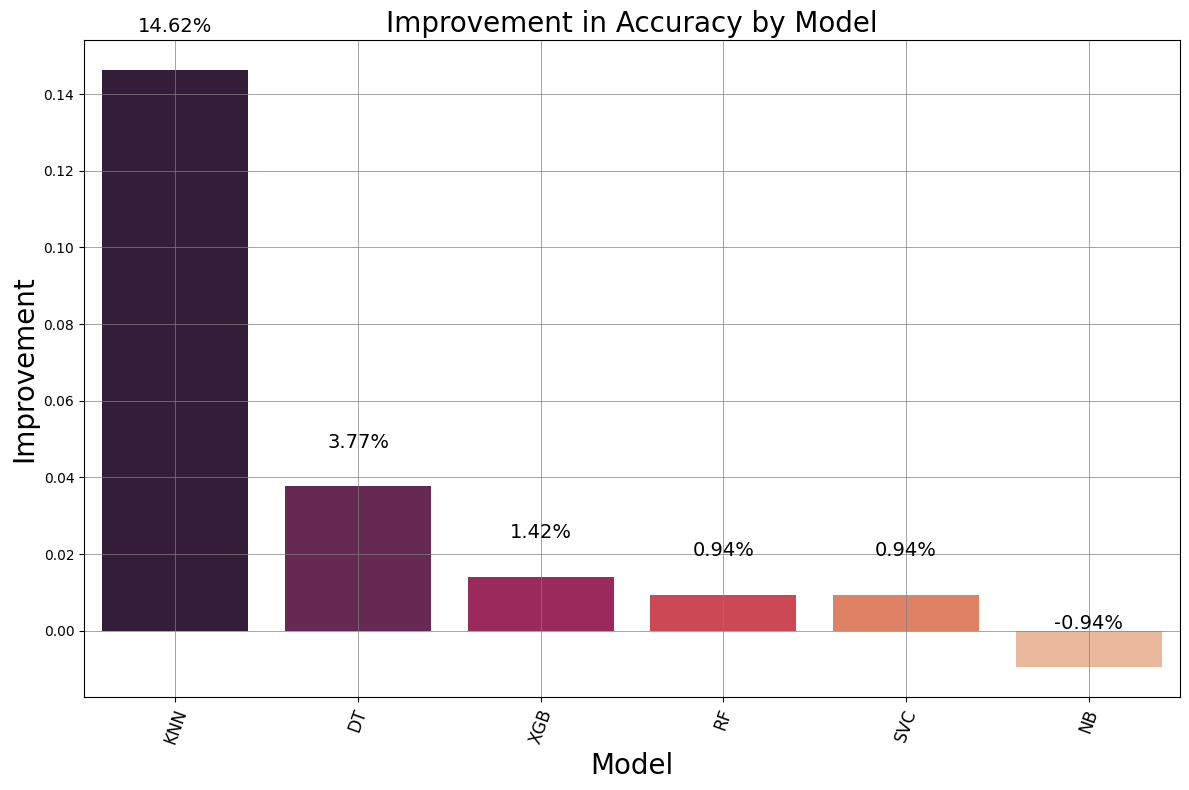

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled, Accuracy_DT_full_labeled, Accuracy_NB_full_labeled, Accuracy_RF_full_labeled, Accuracy_SVC_full_labeled, Accuracy_XGB_full_labeled]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY_10, MV_DT_ACCURACY_10, MV_NB_ACCURACY_10, MV_RF_ACCURACY_10, MV_SVC_ACCURACY_10, MV_XGB_ACCURACY_10]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()


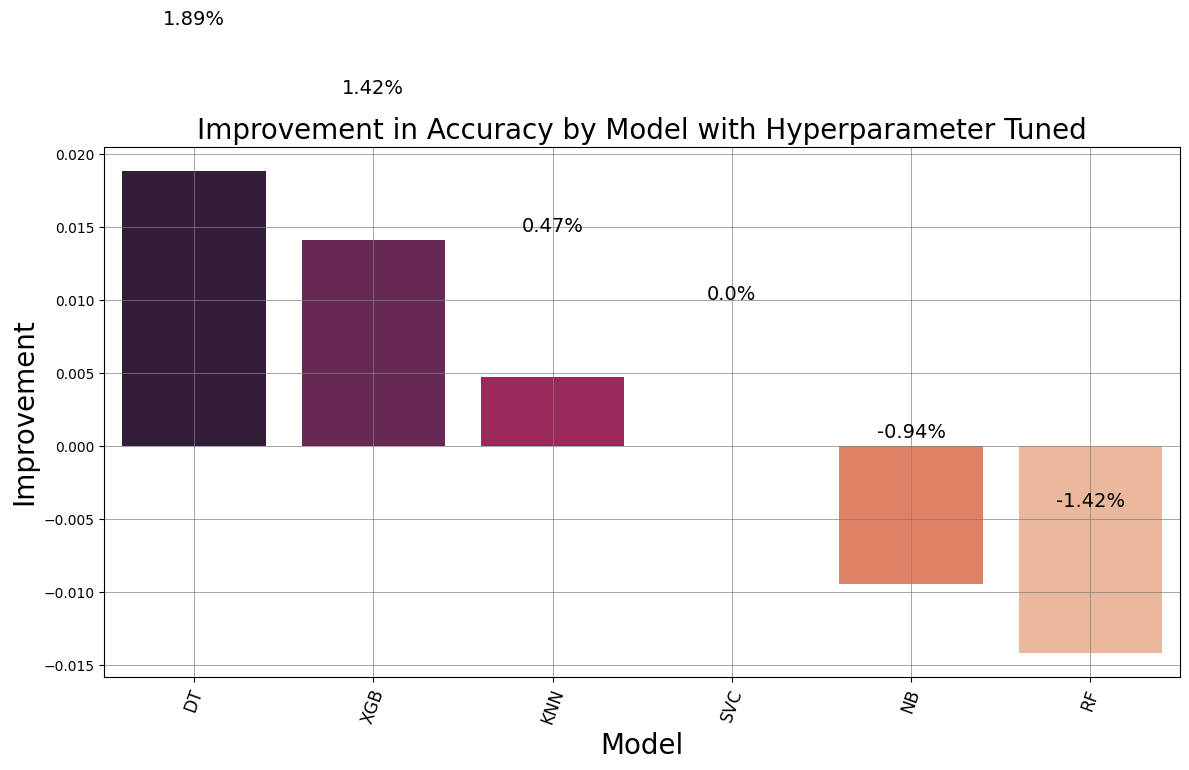

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled_tuned, Accuracy_DT_full_labeled_tuned, Accuracy_NB_full_labeled_tuned, Accuracy_RF_full_labeled_tuned, Accuracy_SVC_full_labeled_tuned, Accuracy_XGB_full_labeled_tuned]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY_10, MV_DT_ACCURACY_10, MV_NB_ACCURACY_10, MV_RF_ACCURACY_10, MV_SVC_ACCURACY_10, MV_XGB_ACCURACY_10]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model with Hyperparameter Tuned", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()
